In [1]:
import json
import codecs
import re
import nltk; nltk.download('stopwords')
from nltk.corpus import stopwords
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Админ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.wrappers import LdaMallet

In [4]:
press_f = codecs.open('C:\\Users\\Админ\\Desktop\\aut_detect\\train.json', 'r',  'utf_8_sig')
jss = json.loads(press_f.read()) 

In [5]:
texts = []
for elem in jss:
    texts.append(elem['text'])

In [6]:
import os


In [7]:
with open("C:\\Users\\Админ\\Desktop\\aut_detect\\texts.txt", "w", encoding="utf-8") as file:
    file.write(str(texts))
  

In [8]:
os.system("mystem.exe -l -d -c texts.txt lem.txt")

1

In [9]:
text = open('C:\\Users\\Админ\\Desktop\\aut_detect\\lem.txt', encoding="utf-8").read()


In [10]:
texts = re.findall("'(.*?)'", text)

In [11]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
data_words = list(sent_to_words(texts))

In [12]:
print(data_words)

[['табличка', 'на', 'воинскии', 'захоронение', 'отремонтировать', 'рамка', 'заключенныи', 'соглашение', 'между', 'регион', 'правительство', 'рф', 'сообщать', 'пресс', 'служба', 'губернатор', 'правительство', 'нижегородскии', 'область', 'министр', 'жкх', 'энергетика', 'нижегородскии', 'область', 'андреи', 'чертков', 'рассказывать', 'что', 'речь', 'идти', 'реставрация', 'табличка', 'на', 'братскии', 'захоронение', 'мемориальныи', 'комплекс', 'не', 'только', 'город', 'но', 'село', 'деревня', 'откуда', 'уходить', 'на', 'фронт', 'житель', 'где', 'лечиться', 'раненыи', 'частность', 'братскии', 'могила', 'приводить', 'порядок', 'на', 'бор', 'арзамас', 'арзамасскии', 'раион', 'саров', 'выкса', 'перевозскии', 'семеновскии', 'починковскии', 'дивеевскии', 'ряд', 'другои', 'раион'], ['два', 'сотрудник', 'администрация', 'арзамасскии', 'раион', 'год', 'неоднократно', 'обманывать', 'собственник', 'жилои', 'помещение', 'из', 'число', 'ребенок', 'сирота', 'ребенок', 'оставаться', 'без', 'попечение', '

In [13]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]


In [14]:
stop_words = stopwords.words('russian')
data_lemmatized= remove_stopwords(data_words)


In [15]:
with open("preprocess_texts.txt", "w", encoding="utf-8") as file:
    file.write(str(data_lemmatized))

In [16]:
id2word = corpora.Dictionary(data_lemmatized)

In [17]:
texts = data_lemmatized

In [18]:
corpus = [id2word.doc2bow(text) for text in texts]

In [19]:
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 2), (23, 2), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 2), (30, 1), (31, 1), (32, 2), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 2), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1)]]


In [20]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('андреи', 1),
  ('арзамас', 1),
  ('арзамасскии', 1),
  ('бор', 1),
  ('братскии', 2),
  ('воинскии', 1),
  ('выкса', 1),
  ('город', 1),
  ('губернатор', 1),
  ('деревня', 1),
  ('дивеевскии', 1),
  ('другои', 1),
  ('житель', 1),
  ('жкх', 1),
  ('заключенныи', 1),
  ('захоронение', 2),
  ('идти', 1),
  ('комплекс', 1),
  ('лечиться', 1),
  ('мемориальныи', 1),
  ('министр', 1),
  ('могила', 1),
  ('нижегородскии', 2),
  ('область', 2),
  ('откуда', 1),
  ('отремонтировать', 1),
  ('перевозскии', 1),
  ('порядок', 1),
  ('починковскии', 1),
  ('правительство', 2),
  ('пресс', 1),
  ('приводить', 1),
  ('раион', 2),
  ('рамка', 1),
  ('раненыи', 1),
  ('рассказывать', 1),
  ('регион', 1),
  ('реставрация', 1),
  ('речь', 1),
  ('рф', 1),
  ('ряд', 1),
  ('саров', 1),
  ('село', 1),
  ('семеновскии', 1),
  ('служба', 1),
  ('соглашение', 1),
  ('сообщать', 1),
  ('табличка', 2),
  ('уходить', 1),
  ('фронт', 1),
  ('частность', 1),
  ('чертков', 1),
  ('энергетика', 1)]]

In [21]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [22]:
lda_model.print_topics()

[(0,
  '0.031*"летнии" + 0.016*"мужчина" + 0.014*"автомобиль" + 0.013*"происходить" + 0.011*"водитель" + 0.010*"год" + 0.010*"область" + 0.009*"женщина" + 0.009*"ск" + 0.009*"человек"'),
 (1,
  '0.013*"центр" + 0.012*"фильм" + 0.012*"кинотеатр" + 0.011*"год" + 0.010*"ветлужскии" + 0.009*"выезд" + 0.009*"становиться" + 0.008*"период" + 0.006*"условие" + 0.006*"жизнь"'),
 (2,
  '0.057*"улица" + 0.019*"ао" + 0.013*"место" + 0.012*"жидкость" + 0.011*"центр" + 0.007*"первыи" + 0.007*"ребенок" + 0.006*"детскии" + 0.006*"команда" + 0.006*"шоссе"'),
 (3,
  '0.032*"водохранилище" + 0.019*"торги" + 0.013*"выставлять" + 0.013*"нюжма" + 0.013*"рыболовство" + 0.013*"аквакультура" + 0.013*"свеча" + 0.013*"рыбоводныи" + 0.009*"избирательныи" + 0.009*"нижегородскии"'),
 (4,
  '0.024*"раион" + 0.023*"область" + 0.021*"шахунья" + 0.020*"нижегородскии" + 0.014*"нижнии" + 0.013*"новгород" + 0.012*"год" + 0.012*"это" + 0.012*"регион" + 0.012*"дорога"'),
 (5,
  '0.025*"рубль" + 0.015*"раион" + 0.014*"нижего

In [23]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better


Perplexity:  -8.16132655011963


In [24]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.48308503797030095


In [25]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

C:\ProgramData\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.160679 -0.019716       1        1  29.523520
4     -0.239296 -0.030137       2        1  18.891865
5     -0.117712  0.110902       3        1  18.662031
0     -0.018164  0.235602       4        1  10.692668
1      0.078329 -0.006410       5        1   5.672597
2      0.164523 -0.043301       6        1   5.405480
8     -0.102374 -0.203960       7        1   4.638452
9      0.122521  0.037517       8        1   4.187129
3      0.151955 -0.037485       9        1   1.225014
6      0.120897 -0.043012      10        1   1.101241, topic_info=     Category        Freq       Term       Total  loglift  logprob
747   Default  154.000000      улица  154.000000  30.0000  30.0000
333   Default  239.000000      рубль  239.000000  29.0000  29.0000
168   Default  145.000000     летнии  145.000000  28.0000  28.0000
557   Default  142.000000     проект  142.000000  27.0000  27.0000
2135  Default  183.000000    шахунья  183.000000  26.0000  26.0000
...       ...         ...        ...         ...      ...      ...
212   Topic10    2.177039     нижнии  352.480286  -0.5783  -5.4102
1320  Topic10    1.716976     первыи   55.160614   1.0390  -5.6476
522   Topic10    1.679134    участие   47.248100   1.1716  -5.6699
268   Topic10    1.642971   развитие   64.966400   0.8314  -5.6917
679   Topic10    1.603980  принимать   51.372982   1.0421  -5.7157

[573 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
7087      5  0.956923  altufievo
691       4  0.924478        ext
7056      8  0.865787         gs
4264      2  0.978289         iv
7088      5  0.956923        mos
...     ...       ...        ...
7086      8  0.865787         яд
1160      2  0.109861     январь
1160      3  0.402823     январь
1160      6  0.073241     январь
1160      8  0.402823     январь

[819 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 5, 6, 1, 2, 3, 9, 10, 4, 7])

In [26]:
import os
from gensim.models.wrappers import LdaMallet

In [27]:
os.environ.update({'MALLET_HOME':r'C:/mallet-2.0.8/'})

mallet_path = 'C:\\mallet-2.0.8\\bin\mallet' # update this path

ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=10, id2word=id2word)

<>:3: DeprecationWarning: invalid escape sequence \m
<>:3: DeprecationWarning: invalid escape sequence \m
<>:3: DeprecationWarning: invalid escape sequence \m
<ipython-input-27-a4a7282382a8>:3: DeprecationWarning: invalid escape sequence \m
  mallet_path = 'C:\\mallet-2.0.8\\bin\mallet' # update this path


In [28]:
print(ldamallet.show_topics(formatted=False))

[(0, [('область', 0.03175355450236967), ('нижегородскии', 0.030805687203791468), ('раион', 0.022511848341232227), ('помощь', 0.015639810426540283), ('весь', 0.012796208530805687), ('год', 0.012322274881516588), ('новыи', 0.01113744075829384), ('медицинскии', 0.00995260663507109), ('раионныи', 0.00995260663507109), ('учреждение', 0.00971563981042654)]), (1, [('год', 0.02543786488740617), ('область', 0.019599666388657216), ('рф', 0.01688907422852377), ('дело', 0.01626355296080067), ('суд', 0.013344453711426188), ('россия', 0.01292743953294412), ('рубль', 0.01292743953294412), ('нижегородскии', 0.012510425354462052), ('ск', 0.011467889908256881), ('уголовныи', 0.010842368640533779)]), (2, [('раион', 0.05165785679961557), ('область', 0.029553099471407978), ('служба', 0.01561749159058145), ('это', 0.01561749159058145), ('пресс', 0.01561749159058145), ('город', 0.013695338779432966), ('нижегородскии', 0.013695338779432966), ('городскои', 0.013695338779432966), ('другои', 0.012734262373858721

In [29]:
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)


Coherence Score:  0.4513391634652272


In [30]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics
    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics
    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [31]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

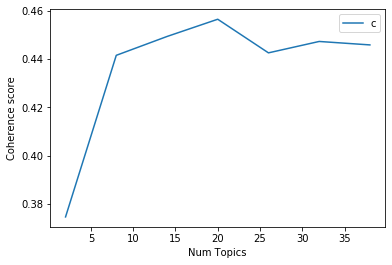

In [32]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [33]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3745
Num Topics = 8  has Coherence Value of 0.4416
Num Topics = 14  has Coherence Value of 0.4494
Num Topics = 20  has Coherence Value of 0.4566
Num Topics = 26  has Coherence Value of 0.4426
Num Topics = 32  has Coherence Value of 0.4474
Num Topics = 38  has Coherence Value of 0.4459


In [34]:
# Select the model and print the topics
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
print(optimal_model.print_topics(num_words=10))

[(0, '0.035*"год" + 0.027*"летнии" + 0.026*"дело" + 0.023*"мужчина" + 0.021*"суд" + 0.019*"рф" + 0.018*"ск" + 0.016*"уголовныи" + 0.016*"су" + 0.013*"признавать"'), (1, '0.072*"новгород" + 0.067*"нижнии" + 0.036*"нижегородскии" + 0.034*"область" + 0.021*"раион" + 0.018*"год" + 0.017*"правительство" + 0.015*"кулебаки" + 0.014*"саров" + 0.012*"человек"'), (2, '0.083*"нижегородскии" + 0.066*"область" + 0.042*"россия" + 0.027*"раион" + 0.021*"округ" + 0.017*"депутат" + 0.017*"владимир" + 0.016*"александр" + 0.016*"это" + 0.016*"апрель"'), (3, '0.042*"область" + 0.030*"управление" + 0.030*"которыи" + 0.028*"это" + 0.024*"региональныи" + 0.016*"направлять" + 0.016*"отходы" + 0.015*"мк" + 0.012*"свои" + 0.012*"руководитель"'), (4, '0.039*"область" + 0.036*"тысяча" + 0.032*"нижегородскии" + 0.019*"предприятие" + 0.017*"тонна" + 0.017*"это" + 0.017*"рассказывать" + 0.017*"хозяиство" + 0.016*"комплекс" + 0.015*"заявлять"'), (5, '0.053*"область" + 0.037*"помощь" + 0.031*"новыи" + 0.026*"регион" +

In [35]:
import pandas as pd
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=texts):
    # Init output
    sent_topics_df = pd.DataFrame()
    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)
df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=texts)
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,4.0,0.3116,"область, тысяча, нижегородскии, предприятие, т...","[табличка, воинскии, захоронение, отремонтиров..."
1,1,0.0,0.1909,"год, летнии, дело, мужчина, суд, рф, ск, уголо...","[сотрудник, администрация, арзамасскии, раион,..."
2,2,0.0,0.1499,"год, летнии, дело, мужчина, суд, рф, ск, уголо...","[следственныи, комитет, рф, нижегородскии, обл..."
3,3,0.0,0.2733,"год, летнии, дело, мужчина, суд, рф, ск, уголо...","[трагедия, происходить, ковакса, арзамасскии, ..."
4,4,13.0,0.3309,"летнии, происходить, водитель, сообщать, челов...","[дтп, происходить, утро, декабрь, год, сообщат..."
5,5,13.0,0.3350,"летнии, происходить, водитель, сообщать, челов...","[угибдд, нижегородскии, область, сообщать, тра..."
6,6,14.0,0.2920,"центр, администрация, школа, город, глава, кон...","[пресс, служба, губернатор, правительство, ниж..."
7,7,8.0,0.3207,"год, сообщать, раион, нижегородскии, регион, о...","[главныи, управление, автомобильныи, дорога, н..."
8,8,6.0,0.1191,"проект, объект, рубль, ооо, федеральныи, регио...","[ноябрь, год, село, шатовка, арзамасскии, раио..."
9,9,0.0,0.3006,"год, летнии, дело, мужчина, суд, рф, ск, уголо...","[су, ск, рф, нижегородскии, область, сообщать,..."


In [36]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()
# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)
# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]
# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)
# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']
# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,4.0,"область, тысяча, нижегородскии, предприятие, т...",64.0,0.1240
1.0,0.0,"год, летнии, дело, мужчина, суд, рф, ск, уголо...",7.0,0.0136
2.0,0.0,"год, летнии, дело, мужчина, суд, рф, ск, уголо...",16.0,0.0310
3.0,0.0,"год, летнии, дело, мужчина, суд, рф, ск, уголо...",14.0,0.0271
4.0,13.0,"летнии, происходить, водитель, сообщать, челов...",24.0,0.0465
...,...,...,...,...
511.0,7.0,"сообщать, река, раион, вода, деревня, богородс...",NaN,NaN
512.0,8.0,"год, сообщать, раион, нижегородскии, регион, о...",NaN,NaN
513.0,6.0,"проект, объект, рубль, ооо, федеральныи, регио...",NaN,NaN
514.0,9.0,"раион, рубль, богородскии, тысяча, сумма, общи...",NaN,NaN


In [37]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()
# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)
# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]
# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)
# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']
# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,4.0,"область, тысяча, нижегородскии, предприятие, т...",64.0,0.1240
1.0,0.0,"год, летнии, дело, мужчина, суд, рф, ск, уголо...",7.0,0.0136
2.0,0.0,"год, летнии, дело, мужчина, суд, рф, ск, уголо...",16.0,0.0310
3.0,0.0,"год, летнии, дело, мужчина, суд, рф, ск, уголо...",14.0,0.0271
4.0,13.0,"летнии, происходить, водитель, сообщать, челов...",24.0,0.0465
...,...,...,...,...
511.0,7.0,"сообщать, река, раион, вода, деревня, богородс...",NaN,NaN
512.0,8.0,"год, сообщать, раион, нижегородскии, регион, о...",NaN,NaN
513.0,6.0,"проект, объект, рубль, ооо, федеральныи, регио...",NaN,NaN
514.0,9.0,"раион, рубль, богородскии, тысяча, сумма, общи...",NaN,NaN


In [38]:
# text = [['табличка', 'воинскии', 'захоронение', 'отремонтировать', 'рамка', 'заключенныи', 'соглашение', 'регион', 'правительство', 'рф', 'сообщать', 'пресс', 'служба', 'губернатор', 'правительство', 'нижегородскии', 'область', 'министр', 'жкх', 'энергетика', 'нижегородскии', 'область', 'андреи', 'чертков', 'рассказывать', 'речь', 'идти', 'реставрация', 'табличка', 'братскии', 'захоронение', 'мемориальныи', 'комплекс', 'город', 'село', 'деревня', 'откуда', 'уходить', 'фронт', 'житель', 'лечиться', 'раненыи', 'частность', 'братскии', 'могила', 'приводить', 'порядок', 'бор', 'арзамас', 'арзамасскии', 'раион', 'саров', 'выкса', 'перевозскии', 'семеновскии', 'починковскии', 'дивеевскии', 'ряд', 'другои', 'раион']]
# id2word = corpora.Dictionary(text)
# train_text =[id2word.doc2bow(i) for i in text]
# print(train_text)


In [39]:
# ldamallet[train_text]

In [40]:
from flask import Flask, jsonify, request, render_template

  
app = Flask(__name__)

  
@app.route("/")
def index():
    return render_template('index.html', themes=0, text=0)

In [42]:
#pyLDAvis.enable_notebook()
#vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
#pyLDAvis.save_html(vis, 'index.html')
#return render_template('index.html')

In [43]:
from pymystem3 import Mystem
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import string
import re
import nltk; nltk.download('stopwords')
from nltk.corpus import stopwords
import numpy as np

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Админ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [44]:
@app.route('/predict', methods=['POST'])
def predict():
    
    window_text = request.form['post_text'] # Получаем в переменную window_text текст из окошка
   
    data_words = []
    m = Mystem()
    lem_text = m.lemmatize(window_text)
    for i in lem_text:
        if i.isalpha():
            data_words.append(i)
   
    data_lemmatized = []
    stop_words = stopwords.words('russian')
    for word in data_words:
        if word not in stop_words:
            data_lemmatized.append(word)
            
    data = []
    data.append(data_lemmatized)
    id2word2 = corpora.Dictionary(data)
    train_text =[id2word2.doc2bow(i) for i in  data]
    result = ldamallet[train_text]
    
    
    return render_template('index.html', text=result)

In [ ]:
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [31/Mar/2020 05:22:04] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [31/Mar/2020 05:22:05] "GET /static/css/main2.css HTTP/1.1" 404 -
127.0.0.1 - - [31/Mar/2020 05:22:21] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [31/Mar/2020 05:22:21] "GET /static/css/main2.css HTTP/1.1" 404 -
